<a href="https://colab.research.google.com/github/neerajkumarvaid/ML_DL_RL_Codes/blob/master/Reinforcement_Learning/Comparing_Epsilons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt

In [2]:
class BanditArm:
  def __init__(self, m):
    self.m = m
    self.m_estimate = 0
    self.N = 0

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.m_estimate = (1 - 1.0/self.N)*self.m_estimate + 1.0/self.N*x

In [3]:
def run_experiment(m1, m2, m3, eps, N):
  bandits = [BanditArm(m1), BanditArm(m2), BanditArm(m3)]

  # count number of suboptimal choices
  means = np.array([m1, m2, m3])
  true_best = np.argmax(means)
  count_suboptimal = 0

  data = np.empty(N)
  
  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(len(bandits))
    else:
      j = np.argmax([b.m_estimate for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    if j != true_best:
      count_suboptimal += 1

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.m_estimate)

  print("percent suboptimal for epsilon = %s:" % eps, float(count_suboptimal) / N)

  return cumulative_average


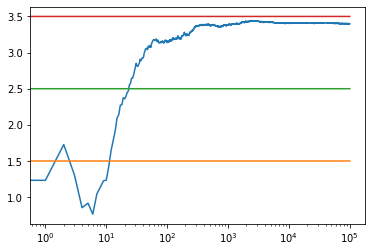

1.4847166986550036
2.4766017883970664
3.5005333454159184
percent suboptimal for epsilon = 0.1: 0.06642


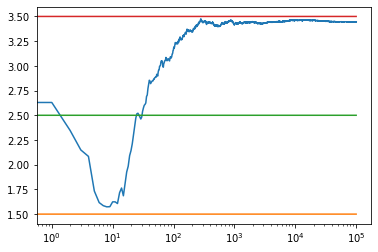

1.5268593226527982
2.4581537563556553
3.494854455469461
percent suboptimal for epsilon = 0.05: 0.03417


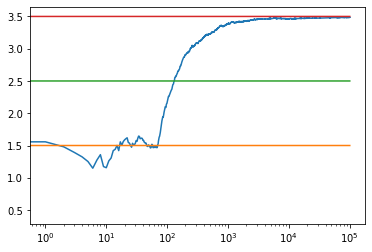

1.4777640969567902
2.419391587496685
3.497468018905898
percent suboptimal for epsilon = 0.01: 0.00772


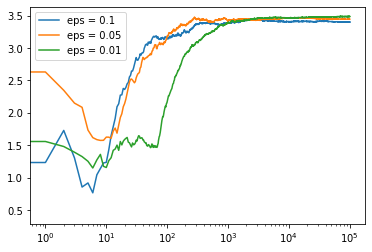

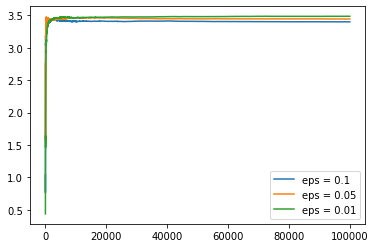

In [4]:
if __name__ == '__main__':
  m1, m2, m3 = 1.5, 2.5, 3.5
  c_1 = run_experiment(m1, m2, m3, 0.1, 100000)
  c_05 = run_experiment(m1, m2, m3, 0.05, 100000)
  c_01 = run_experiment(m1, m2, m3, 0.01, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.show()

